In [1]:
import numpy as np
from stl import mesh
from PIL import Image
import matplotlib.pyplot as plt

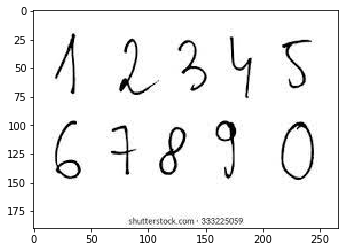

In [36]:
img = Image.open('C:/Users/umendra/OneDrive/Pictures/MyImage/tesseract_number1.jpg')
#img = Image.open('C:/Users/umendra/OneDrive/Pictures/MyImage/Face2.jpg')
#img = Image.open('C:/Users/umendra/OneDrive/Pictures/Collage/20210408_190748.jpg')
plt.imshow(img)

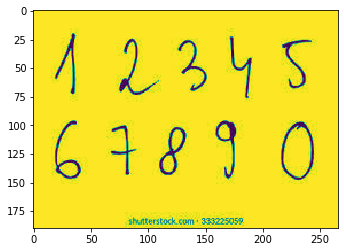

In [37]:
grey_img = img.convert('L')
#grey_img = grey_img.resize((500,500))
imageAr = np.array(grey_img)
imageAr.shape
plt.imshow(grey_img)

In [33]:
(nrow,ncol) = imageAr.shape
max_height = 10
max_pixel = imageAr.max()
vertices = np.zeros((nrow,ncol,3))
faces = []

for x in range(0,nrow):
    for y in range(0,ncol):
        z = (imageAr[x][y]*max_height)/max_pixel
        vertices[x][y]=(x,y,z)

for x in range(0,nrow-1):
    for y in range(0,ncol-1):
        v1 = vertices[x][y]
        v2 = vertices[x][y+1]
        v3 = vertices[x+1][y+1]
        v4 = vertices[x+1][y]
        face1 = np.array((v1,v2,v3))
        face2 = np.array((v1,v3,v4))
        faces.append(face1)
        faces.append(face2)

In [30]:
facesNp = np.array(faces)
surface = mesh.Mesh(np.zeros(facesNp.shape[0],dtype=mesh.Mesh.dtype))
for i,f in enumerate(faces):
    surface.vectors[i] = facesNp[i]
surface.save('C:/Users/umendra/Downloads/ForGit.stl')    